Criando gráficos de CandleStick com MatPlotLib
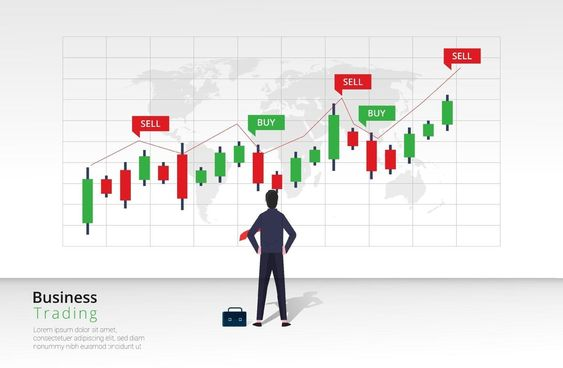

É uma biblioteca de criação de gráficos

In [3]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 877.8 kB/s eta 0:00:00


*colocamos uma ! antes do comando pois quando estamos codando nas celulas do colab, ele espera codigo, e quando estamos fazendo algum comando interno precisamos colocar a exclamação para ele indentificar que é um comando interno*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots



yf é uma api que tem dados/informações sobre quase todas as ações abertas no mundo

In [32]:
df = yf.download("PETR4.SA", start='2023-01-01', end='2023-12-31' )
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


*utilizamos o metodo donwload da api, sendo o primeiro parametro o nome da ação que você  quer baixar (tem o .sa no final pois o criador da api determinou que toda ação brasileira deve ter esse acronimo no final); O segundo parametro é o período que vamos buscar esses dados, começando de tal periodo (start) que é a data inicial dos dados (seguindo o padrão aa/mm/dd) é interessante notar que ele irá retornar menos dias que 365 isso porque ele vai pegar apenas os dias uteis.*

**renomeando as colunas de um data-frame**

In [33]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

*Esse comando exibe todas as colunas que tem na nossa base de dados*

In [34]:
df.columns = ["Abertura", "Maximo", "Minimo", "Fechamento", "fechamento_ajustado", "volume_transacional"]
df

,Abertura,Maximo,Minimo,Fechamento,fechamento_ajustado,volume_transacional
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


*para renomear todos os nomes das colunas de um dataframe vamos utilizar esse mesmo comando porem atribuindo a ele os novos nomes de cada coluna, seguindo a sequencia da mesma ordem que foi exibida na chamada acima, é obrigatorio passar um nome novo para cada coluna.*

In [35]:
df = df.rename_axis("Data")
df

,Abertura,Maximo,Minimo,Fechamento,fechamento_ajustado,volume_transacional
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


*Essa é uma função que também renomeia colunas, mas com ela é possivel renomear apenas uma coluna*

**Criação de gráficos/Plotar Gráficos**

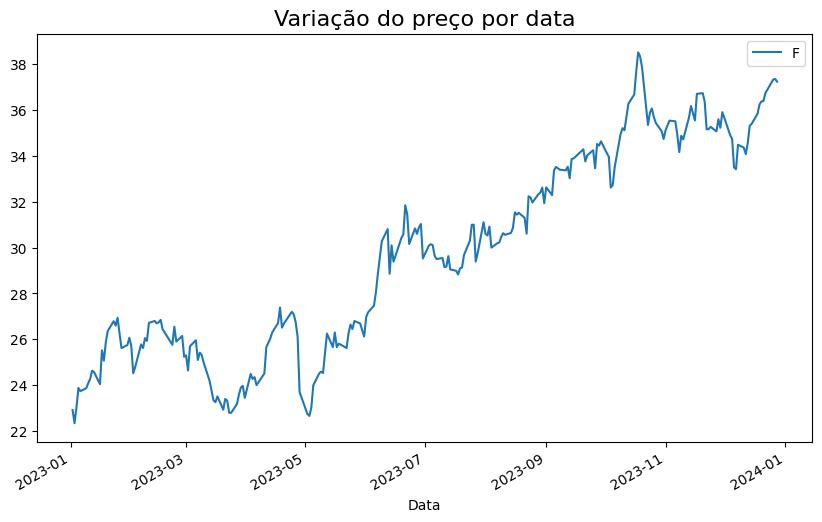

In [36]:
#pandas
df["Fechamento"].plot(figsize=(10,6))

#matplot lib
plt.title("Variação do preço por data", fontsize=16) #insere o titulo no grafico, o atributo fontsize é o tamanho da fonte
plt.legend("Fechamento") #adiciona a coluna fechamento como legenda das linhas azuis

*figsize recebe o tamanho,altura;*

*Aqui nesse caso utilizamos duas  bibliotecas, o pandas (que possui uma pequena gama de opções de criação de gráficos, apenas o basico) e o matplot lib (apelidade de plt no codigo) onde no momento da execução, o gráfico só  sera exibido apos cada um fazer sua iteração com suas devidas funcionalidades no código de acordo com como indicamos para eles fazerem*

**Criando gráfico de candleStick**

In [37]:
#Pega somente as 60 primeiras linhas do df principal
df_candlestick = df.head(60).copy()

#Convertendo o indice em uma coluna de data
df_candlestick["Data"] = df_candlestick.index #converte a coluna data em indice para todo o dataframe
#Convertendo as datas para o formato número de matplotlib
#Isso é necessário para que matplotlib plote corretamente as datas no gráfico

df_candlestick["Data"] = df_candlestick["Data"].apply(mdates.date2num) #adiciona essa nova coluna no final do dataframe
df_candlestick

,Abertura,Maximo,Minimo,Fechamento,fechamento_ajustado,volume_transacional,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613497,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030733,58130000,19369.0


*Na primeira linha nos estamos copiando as 60 primeiras linhas apartir do topo, do df principal para um novo data-frame chamado df_candlestick.*

*Na segunda linha adiante, pegamos a data (que ela esta sendo usada como indice, assim como visto no gráfico inicial) e vamos jogar essa data em uma nova coluna, e depois de jogar nessa nova coluna, vamos converter a data (isso porque a data é visual, mas o matplotlib entende ela como um número, então é necessário utilizar o apply para converter o formato do dado) usando o apply, que ira receber outra função que iremos aplicar em toda a base de dados. No caso acima, ira transformar as datas em números em todas as 60 linhas do dataframe.*

*Mdates é um metodo do matplotlib para manipulação de datas. Ele possui algumas funções de manipular datas dentro dete, no caso acima estamos utilizando a date2num que ira converter para um número*

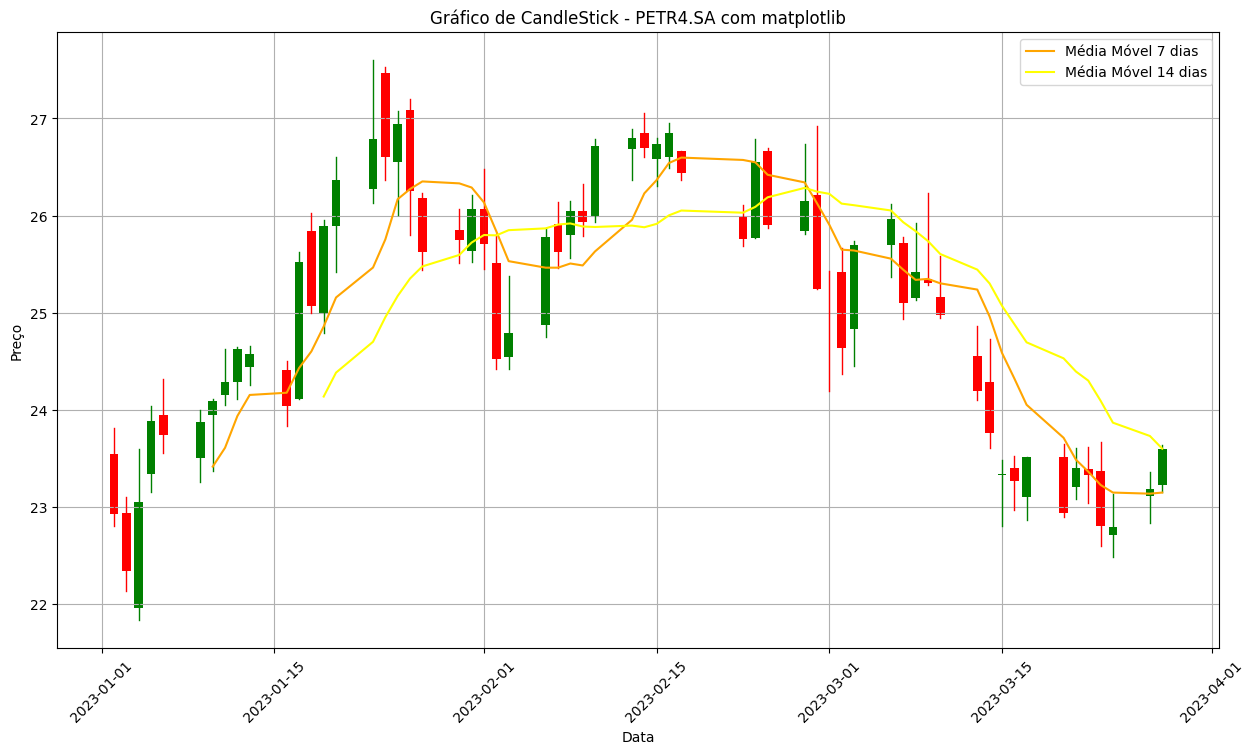

In [50]:
fig, ax = plt.subplots(figsize=(15,8))

#Definindo a largura dos candles no gráfico
width = 0.7

for i in range(len(df_candlestick)):
  #Determinando a cor do candle
  #Se o preço de fechamento for maior que o de abertura
  #O candle é verde (a ação valorizou nesse dia)
  #Se o preço for menor, o candle é vermelho (ação desvalorizou)
  if df_candlestick["Fechamento"].iloc[i] > df_candlestick["Abertura"].iloc[i]:
    color = "green"
  else:
    color = "red"

  #Desenhando a linha vertical do candle (mecha)
  #Essa linha mostra os preços máximo (topo da linha) e minimo (base da linha) do dia.
  #Usamos 'ax.plot' para desenhar uma linha vertical
  #[df_candlestick["Data"].iloc[i], df_candlestick["Data"].iloc[i]] define o ponto x da linha (a data),
  # e [df_candlestick["Minimo"].iloc[i], df_candlestick["Maximo"].iloc[i]] define o ponto y da linha
  ax.plot([df_candlestick["Data"].iloc[i], df_candlestick["Data"].iloc[i]],
          [df_candlestick["Minimo"].iloc[i], df_candlestick["Maximo"].iloc[i]],
          color=color,
          linewidth=1)


  ax.add_patch(plt.Rectangle((df_candlestick["Data"].iloc[i] - width/2, min(df_candlestick["Abertura"].iloc[i], df_candlestick["Fechamento"].iloc[i])),
                           width,
                           abs(df_candlestick["Fechamento"].iloc[i] - df["Abertura"].iloc[i]),
                           facecolor=color))



df_candlestick["MA7"] = df_candlestick["Fechamento"].rolling(window=7).mean()
df_candlestick["MA14"] = df_candlestick["Fechamento"].rolling(window=14).mean()

#Plotando as medias moveis
ax.plot(df_candlestick["Data"], df_candlestick["MA7"], color="orange", label="Média Móvel 7 dias") #Media de 7  dias
ax.plot(df_candlestick["Data"], df_candlestick["MA14"], color="yellow", label="Média Móvel 14 dias") #Media de 14 dias
#Adicionando legenda para as medias moveis
ax.legend()


#Formatando o eixo x para mostrar as datas
#Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #Este metodo é usado para ao matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

#Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de CandleStick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

#Adicionando uma grade para facilitar a vizualização dos valores
plt.grid(True)

#Exibindo o gráfico
plt.show()

*fig e ax são resultados da função subplots que está dentro do matplotlib, e nessa linha estamos criando a tela inicial onde estara o gráfico, adicionando laargura e altura a ela;
px é como se fosse o pincel que usamos para criar coisas nesse gráfico*

*O laço de repetição possui duas funções dentro dele; a primeira (de dentro pra fora) é o len que pega o tamanho do dataframe (60) a segunda é o range, que é como se estivessemos escrevendo do tamanho 0 ao lenght (len, ou seja, 60), ele ira fazer isso de data a data nas 60 linhas e vai escrever cada objeto para compor o gráfico.*

*A linha do gráfico candlestick é atrás do retangulo, então fazemos primeiro a linha para depois fazer o retangulo; A linha representa o minimo e o maximo, é o que justamente fazemos no código, pegando a data (o ponto minimo,onde ela ira começar a linha) e a data novamente (onde ela ira riscar o ponto maximo), passando também a cor e a largura da linha*

*para adicionar os elementos do candlestick, utlizamos o metodo patch que adicionar objetos dentro do matplotlib, que nesse caso estamos adicionando o retangulo; Ele possui uma largura (pode-se  dizer como um ponto x e y) sendo o x ["Data"].iloc[i] - width/2, enquanto o y seria o  minimo entre a abertura e o fechamento (a função min ela vai retornar o menor numero entre dois valores);*

*o x é basicamente um deslocamento pequeno para centralizar o retangulo na nossa linha (a nossa linha ja esta desenhada antes de  inserir os retangulos) se não fizessemos esse deslocamento, o retangulo iria sair do lado da linha, ficaria descentralizado da linha;*

*Após esses  parametros, ele tem a largura que determina ate onde o retangulo ira se expandir, e o proximo retangulo diz ate onde ele irá crescer; É um calculo usando a função abs (absoluto), para que o resultado sempre seja uma absoluta positiva, como um modulo em matematica;*

*basicamente passamos como parametro (x, y, largura, altura, cor)*

*No trecho que plota as medias moveis, primeiramente criamos duas colunas com a abriviação  MA7 e MA14 que é basicamente media movel e quantidade de dias, utilizando a função rolling que basicamente vai rolar pelo  dataframe de 7 em 7 ou 14 em 14 e ir gerando a media desses pontos até acabar o dataframe; a mesma logica para 14 dias*

*Chamamos o pincel novamente e plotamos, para cada data tera o ponto MA7 ou MA14, ele fara pontinho por pontinho para dar a sensação de linha; Adicionamos uma label para saber o significado daquela linha (se é uma media movel de 7 dias ou 14 dias); E o ax.legend é para exibir a legenda.*

*Uma observação interessante: o gráfico só começa a contar apartir da quantidade de dias definida para a media movel;*

In [53]:
#Criando Subplots
"""
Primeiro, criamos uma figura que contera nossos gráficos usando  make_subplots
Isso nos permite ter multiplos gráficos em uma única vizualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume
de transações.
"""
#Duas linhas pois temos os graficos na parte de cima e em baixo
#shared_xaxes diz que o y e o x irão compartilhar o mesmo eixo
#Vertical spacing é um espaço entre os dois retangulos
#titles define o titulo de cada grafico
#Row_width é uma questão de espaçamento
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Candlesticks", "Volume Transacionado"),
                    row_width=[0.2, 0.7])

"""
No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, maximo e minimo. Vamos adicionar este gráfico a nossa figura
"""

#Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df_candlestick.index,
                             open=df_candlestick["Abertura"],
                             high=df_candlestick["Maximo"],
                             low=df_candlestick["Minimo"],
                             close=df_candlestick["Fechamento"],
                             name="Candlestick"),
                             row=1, col=1)

#Adicionando as medias moveis
#Adicionando tambem medias moveis ao mesmo subplot para analise de tendencias
fig.add_trace(go.Scatter(x=df_candlestick.index,
                           y=df_candlestick["MA7"],
                           mode="lines",
                           name="MA7 - Media Movel 7 Dias"),
                           row=1, col=1)

fig.add_trace(go.Scatter(x=df_candlestick.index,
                           y=df_candlestick["MA14"],
                           mode="lines",
                           name="MA14 - Media Movel 14 Dias"),
                           row=1, col=1)

#Adicionando o gráfico de barras para o volume
#Em seguida criamos um gráfico de barras para o volume de transações, que nos da uma ideia da atividade de negociações naquele dia
fig.add_trace(go.Scatter(x=df_candlestick.index,
                           y=df_candlestick["volume_transacional"],
                           name="volume_transacional"),
                           row=2, col=1)

#Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando titulos, formatos de eixo e outras configurações para tornar o gráfico claro e legivel
fig.update_layout(yaxis_title="Preço",
                  xaxis_rangeslider_visible=False, #Desativa o render slider
                  width=1100, height=600)

#Mostrando o gráfico
fig.show()

*Na seção de criação dos sublplots você começa definindo a figura, a tela, os parametros dessa tela; AO invez de fazer tudo manualmente do grafico, essa biblioteca ja disponibiliza uma função candlestick por exemplo, para conseguir fazer de forma automatica esses elementos;*

**API MAGICA**

In [58]:
df = yf.download("PETR4.SA", start='2023-01-01', end='2023-12-31' )

[*********************100%%**********************]  1 of 1 completed


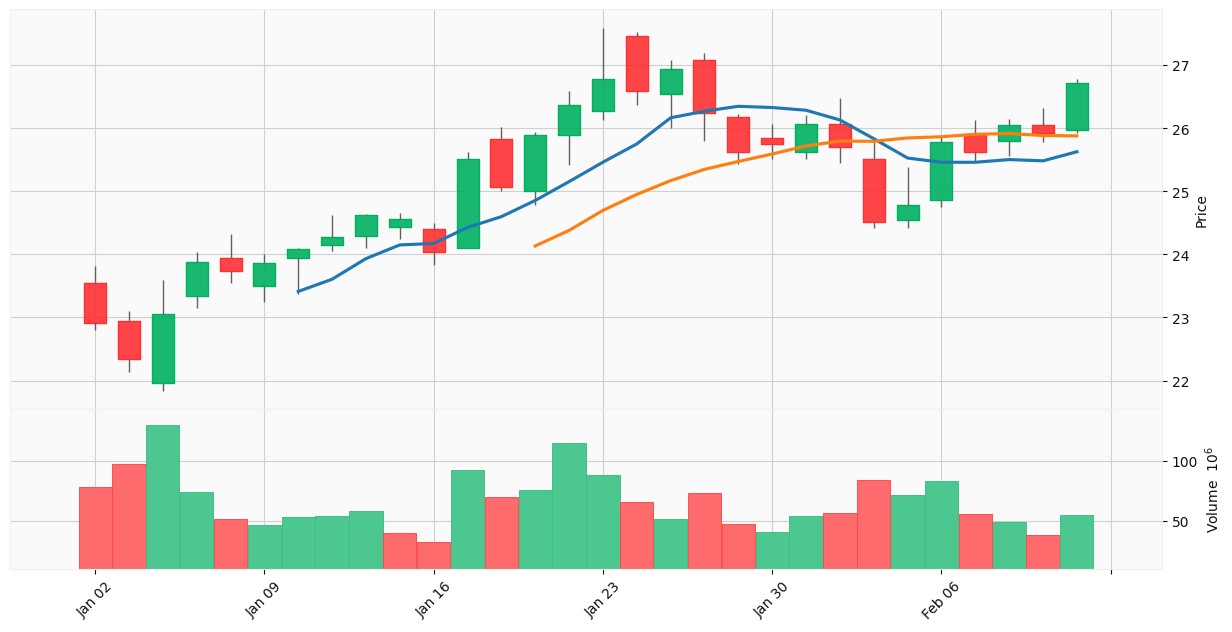

In [64]:
mpf.plot(df.head(30), type="candle", figsize = (16,8), volume=True, mav=(7,14), style="yahoo")

*Tudo que fizemos anteriormente pode ser feito com apenas uma linha utilizando essa api*

*E para utilizar a api, utilizamos alguns parametros: primeiro  passamos a base de dados com apenas as 30 primeiras linhas, passamos o ttipo de dados, o tamanho da figura, o volume (se é para exibir os volumes inferiores, ou seja, o grafico da parte inferior), as medias moveis (aqui precisamos apenas passar as medias que queremos), o style é o estilo do gráfico (cores e etc)*

**DESAFIO - AÇÕES DA APLE**

In [15]:
dt_apple = yf.download("AAPL", start="2024-01-01", end="2024-04-12")
dt_apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.403412,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.015198,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.678177,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.949097,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.323517,59144500
...,...,...,...,...,...,...
2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200


In [16]:
#Renomeando colunas
dt_apple.columns
dt_apple.columns = ["abertura", "maximo", "minimo", "fechamento","fechamento_ajustado", "volume_transacional"]
dt_apple

,abertura,maximo,minimo,fechamento,fechamento_ajustado,volume_transacional
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.403412,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.015198,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.678177,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.949097,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.323517,59144500
...,...,...,...,...,...,...
2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200


In [17]:
#Renomeando a coluna indice
dt_apple = dt_apple.rename_axis("Data")
dt_apple

,abertura,maximo,minimo,fechamento,fechamento_ajustado,volume_transacional
Data,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.403412,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.015198,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.678177,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.949097,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.323517,59144500
...,...,...,...,...,...,...
2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200


In [23]:
#Renomeando as colunas
dt_apple.columns = ["Open", "High", "Low", "Close","Adj Close", "Volume"]

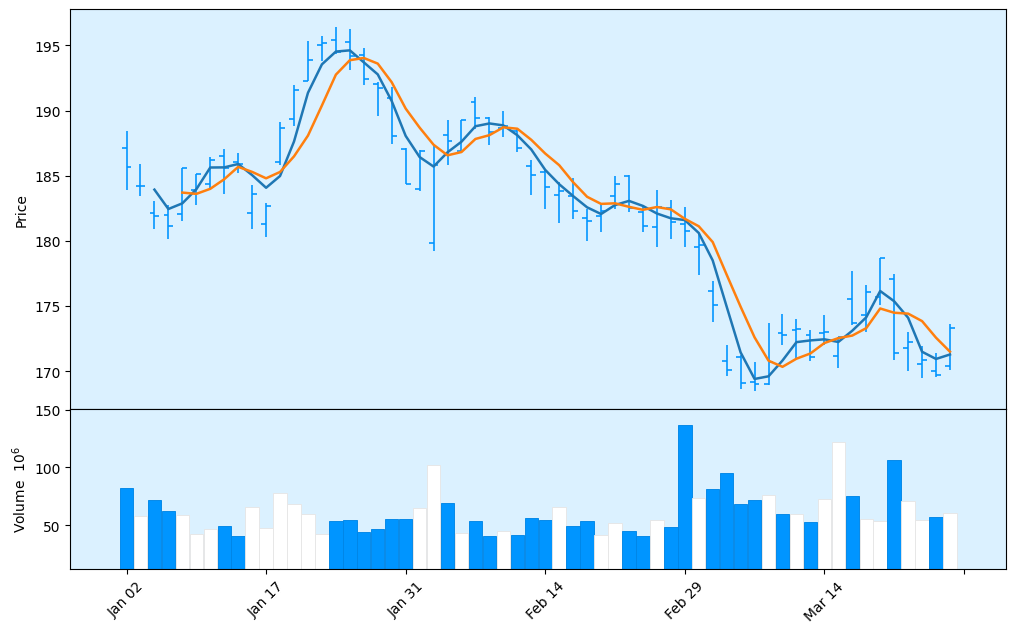

In [24]:
#Plotando gráfico com API
mpf.plot(dt_apple[0:60], type="ohlc", figsize = (13,8), volume=True, mav=(3,5), style="blueskies") #Mv=MediaMovel

**DESAFIO - ESTILIZANDO O GRÁFICO**